In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
import pandas as pd
from astropy.io import ascii
import scipy.stats as stats
import requests
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
# load the basic cfp table
cfpTable = pd.read_csv("cfpTable.csv") # anything in "" is a string (also '')
print("cfpTable contains data for " + str(len(cfpTable)) + " KOIs")


cfpTable contains data for 8054 KOIs


In [43]:
cfpTable

,kepoi_name,fpwg_koi_period,fpwg_disp_status,fpwg_disp_source,fpwg_disp_eb,fpwg_disp_offst,fpwg_disp_perep,fpwg_disp_other,fpwg_flux_ss,fpwg_flux_slflum,...,dec,galLong,galLat,pp_host_rel_prob,pp_host_prob_score,pp_1hi_starid,pp_1hi_rel_prob,pp_2hi_starid,pp_2hi_rel_prob,pp_unk_rel_prob
0,K00889.01,8.88,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.577381,69.199981,9.719333,1.000000e+00,1.00,KIC 757450,1.000000e+00,KIC 757441,9.100000e-102,0.000002
1,K01009.01,5.09,CERTIFIED FP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,36.678841,69.297735,9.753565,5.100000e-37,1.00,UKIRT 44117921893471,1.000000e+00,KIC 892772,5.100000e-37,0.000017
2,K07621.01,275.07,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.771042,69.337736,9.880650,3.800000e-01,0.06,UKIRT 44117921624732,3.800000e-01,KIC 1025986,3.800000e-01,0.000235
3,K06252.01,8.46,CERTIFIED FP,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,36.729271,69.303605,9.854511,1.000000e+00,1.00,KIC 1026032,1.000000e+00,NaN,NaN,0.000004
4,K00958.01,21.76,POSSIBLE PLANET,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,36.743610,69.393389,9.710243,1.000000e+00,1.00,KIC 1026957,1.000000e+00,KIC 1026951,8.800000e-101,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,K00298.01,19.96,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.055519,83.423713,16.671570,9.700000e-01,1.00,KIC 12785320,9.700000e-01,UKIRT 44117904239969,2.400000e-02,0.000010
8050,K00487.01,7.66,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.149132,83.452208,16.847862,1.000000e+00,1.00,KIC 12834874,1.000000e+00,UKIRT 44117904206385,5.200000e-42,0.000005
8051,K02184.02,95.91,NOT EXAMINED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.220341,83.503031,16.916093,6.600000e-01,0.06,KIC 12885212,6.600000e-01,KIC 12885219,2.700000e-01,0.000135
8052,K02184.01,2.06,CERTIFIED FP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,52.220341,83.503031,16.916093,5.800000e-100,0.95,KIC 12885214,9.900000e-01,KIC 12885213,5.700000e-03,0.000048


In [3]:
# show what properties this table contains
# for definitions of the koi_ ones see https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html
list(cfpTable)

['kepoi_name',
 'fpwg_koi_period',
 'fpwg_disp_status',
 'fpwg_disp_source',
 'fpwg_disp_eb',
 'fpwg_disp_offst',
 'fpwg_disp_perep',
 'fpwg_disp_other',
 'fpwg_flux_ss',
 'fpwg_flux_slflum',
 'fpwg_flux_oedp',
 'fpwg_flux_vshape',
 'fpwg_flux_depth',
 'fpwg_flux_dilutn',
 'fpwg_flux_lcurve',
 'fpwg_flux_ootvar',
 'fpwg_flux_corvar',
 'fpwg_flux_other',
 'fpwg_flux_stellr',
 'fpwg_flux_noteb',
 'fpwg_offst_sig',
 'fpwg_offst_badim',
 'fpwg_offst_inval',
 'fpwg_offst_vis',
 'fpwg_offst_star',
 'fpwg_offst_qvars',
 'fpwg_offst_other',
 'fpwg_offst_nooff',
 'fpwg_perep_match',
 'fpwg_perep_direc',
 'fpwg_perep_col',
 'fpwg_perep_ghost',
 'fpwg_perep_video',
 'fpwg_perep_ref',
 'fpwg_fa_starvar',
 'fpwg_fa_unique',
 'fpwg_fa_thermal',
 'fpwg_fa_ntl',
 'fpwg_fa_artifact',
 'fpwg_fa_other',
 'fpwg_fa_notfa',
 'fpwg_fop_rvs1',
 'fpwg_fop_rvs2',
 'fpwg_fop_rvs3',
 'fpwg_fop_dblline',
 'fpwg_fop_imexam',
 'fpwg_fop_imblend',
 'fpwg_efp_public',
 'fpwg_efp_pubexam',
 'fpwg_efp_accept',
 'fpwg_ob

In [4]:
# each of the KOIs has all those properties  
# to list a particular KOI by its position in the table we type
print(cfpTable.iloc[0])
# which lists all the information for the first KOI
# the thing in the brackets (=0 in this case) is called the index

# the index in the square brackets picks out a particular KOI

# to list specific property for that KOI we type the information's name
print(cfpTable.iloc[0].koi_period) # automatically same as print(str(cfpTable.iloc[0].koi_period))

# to make it look nice we 
print("the first KOI's period is " + str(cfpTable.iloc[0].koi_period) + " days")
print("the 10th KOI's period is " + str(cfpTable.iloc[9].koi_period) + " days")
# so to get KOI #N we use the index N-1 because python always has the first object at index 0

# we can also access a KOI by its name
print(cfpTable[cfpTable.kepoi_name == "K00889.01"].koi_period)
# the "==" means "is equal to" (very different from "=" which sets one thing equal to another)
print(cfpTable[cfpTable.kepoi_name == "K00200.01"].koi_period)
# to get rid of the annoying first colum, which is the KOI's index, we have to type the rather ugly thing
print(cfpTable[cfpTable.kepoi_name == "K00200.01"].koi_period.to_string(index=False, header=False))


kepoi_name             K00889.01
fpwg_koi_period             8.88
fpwg_disp_status    NOT EXAMINED
fpwg_disp_source             NaN
fpwg_disp_eb                 NaN
                        ...     
pp_1hi_starid         KIC 757450
pp_1hi_rel_prob                1
pp_2hi_starid         KIC 757441
pp_2hi_rel_prob         9.1e-102
pp_unk_rel_prob        1.726e-06
Name: 0, Length: 327, dtype: object
8.884922995
the first KOI's period is 8.884922995 days
the 10th KOI's period is 161.78832712 days
0    8.884923
Name: koi_period, dtype: float64
2440    7.340715
Name: koi_period, dtype: float64
 7.340715


In [44]:
print(cfpTable[cfpTable.kepoi_name == "K00889.01"])

  kepoi_name  fpwg_koi_period fpwg_disp_status  fpwg_disp_source  \
0  K00889.01             8.88     NOT EXAMINED               NaN   

   fpwg_disp_eb  fpwg_disp_offst  fpwg_disp_perep  fpwg_disp_other  \
0           NaN              NaN              NaN              NaN   

   fpwg_flux_ss  fpwg_flux_slflum  ...        dec    galLong    galLat  \
0           NaN               NaN  ...  36.577381  69.199981  9.719333   

   pp_host_rel_prob  pp_host_prob_score  pp_1hi_starid  pp_1hi_rel_prob  \
0               1.0                 1.0     KIC 757450              1.0   

   pp_2hi_starid  pp_2hi_rel_prob  pp_unk_rel_prob  
0     KIC 757441    9.100000e-102         0.000002  

[1 rows x 327 columns]


In [5]:
# To get the same property about all KOIs, we just don't type the brackets
print(cfpTable.koi_period)
# we call this a vector of properties, which in this case is all the KOI's planet radii

# here is another vector of properties giving the radius of all the KOIs
print(cfpTable.koi_prad)
# it is VERY IMPORTANT that these vectors are in the same order, so the 10th entry gives
# the period and radius of the same KOI

0         8.884923
1         5.092465
2       275.073650
3         8.460439
4        21.761298
           ...    
8049     19.963672
8050      7.658800
8051     95.906433
8052      2.057500
8053      1.099291
Name: koi_period, Length: 8054, dtype: float64
0       10.51
1        1.17
2        1.86
3       36.62
4        2.53
        ...  
8049     1.50
8050     2.19
8051     2.17
8052     1.27
8053     1.37
Name: koi_prad, Length: 8054, dtype: float64


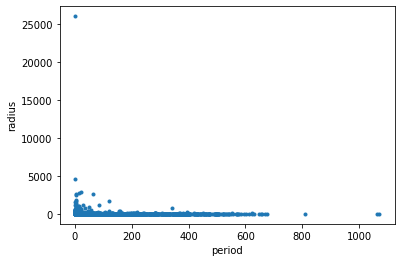

In [47]:
# what we want to know is the relationship between different properties.
# this is best done with plots.  Here is an example
plt.plot(cfpTable.koi_period, cfpTable.koi_prad, '.');
# the plot command takes numbers for the x axis, numbers for the y axis, and plots them
# plt.plot(xData, yData, format)
# the '.' is a format command which says "plot each (x,y) pair as a dot" 
# the default, without a format command, is to draw lines between the dots, which 
# would look terrible for us because the dots are not in order (try removing the '.')

# we have to label the x axis to say what data is x and the same for y, 
# otherwise it would be very hard to interpre the plot.
plt.xlabel("period");
plt.ylabel("radius");

# the result is a bunch of dots, most of which have low periods and small radius.  
# this reflects the fact that most planets found by Kepler are close to their stars
# with short orbital periods because those are the easiest ones to find.
# But also there are more small planets than large planets.  This was a surprise!

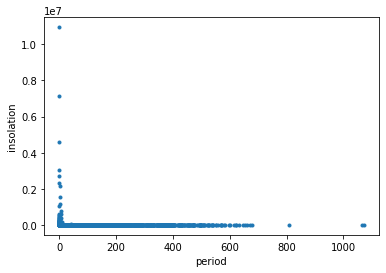

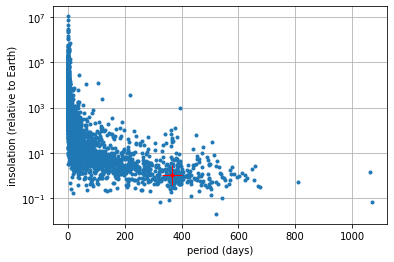

In [7]:
# let's try plotting different properties
plt.plot(cfpTable.koi_period, cfpTable.koi_insol, '.')
plt.xlabel("period")
plt.ylabel("insolation")
# koi_insol tells us the amount of sunlight falling on the planet (called "insolation"), relative to the amount
# of sunlight falling on the Earth
# the plot has a very large range of insolation values, which makes us want to use log plotting in the y direction
plt.figure() # make a new figure so it doesn't plot on top of the last figure
plt.semilogy(cfpTable.koi_period, cfpTable.koi_insol, '.') # semilogy means log plot in the y direction only
# plt.semilogx for a log x plot
# plt.loglog for log plot in both x and y
plt.xlabel("period (days)")
plt.ylabel("insolation (relative to Earth)")
# on the y axis, 1e7 means the units are in 10 million times the Earth's insolation!
# in the second plot we can see more clearly how the shorter the orbital period the more sunlight 
# you get on the planet because it is closer to the star.
# For each orbital period there is a wide range of insolation because the stars are different brightness.

# We can turn on a grid, which makes it easier to see which planets have the same amount of light as the Earth
# Remember, 10 to the zeroth power = 1 (in python we write 10**0 = 1, because two stars ** means exponent)
plt.grid()
# Let's put a dot in another color at the Earth's orbital period an insolation, so we can see 
# which planets are kind of like Earth
plt.plot(365.25, 1, 'r.')
# In the format string, adding 'r' sets the color to red
# we cal also use a different marker, like a '+', and make it big using the markersize command
plt.plot(365.25, 1, 'r+', markersize=20)



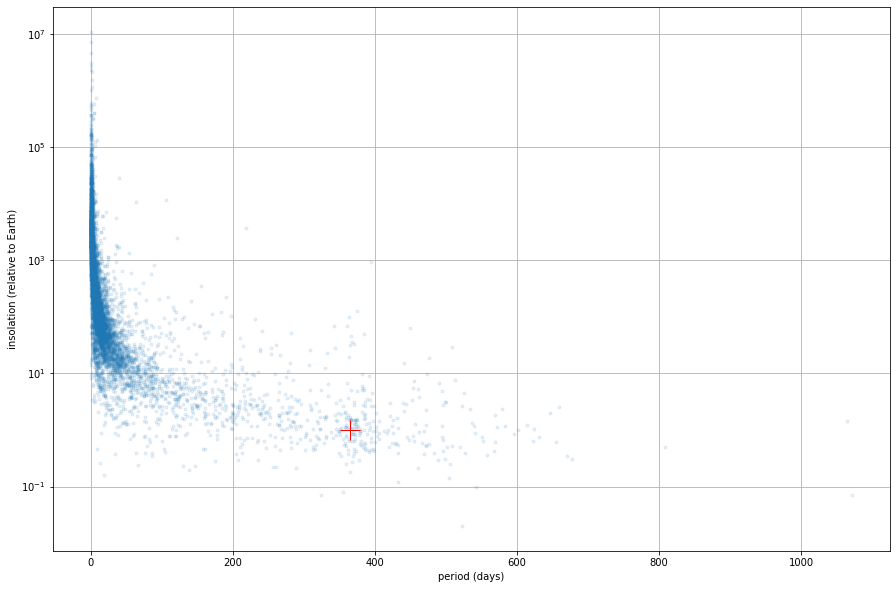

In [49]:
# Because there are so many KOIs they are plotting on top of each other, and we can't tell 
# where there are lots and lots of KOIs vs. just lots.
# We can help this using transparency, controlled by the "alpha" command.
# alpha = 0 means completely transparent (so you don't see it), alpha = 1 means completely opaque
# we'll also make a bigger plot to make it easier to see using the figsize command inside figure()
plt.figure(figsize = (15,10)) # figsize needs a pair of numbers in parentheses.
plt.semilogy(cfpTable.koi_period, cfpTable.koi_insol, '.', alpha=0.1) # alpha=0.1 means almost transparent
plt.xlabel("period (days)")
plt.ylabel("insolation (relative to Earth)")
plt.grid()
plt.plot(365.25, 1, 'r+', markersize=20)


/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/py3.6/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'planet radius (Earth = 1)')

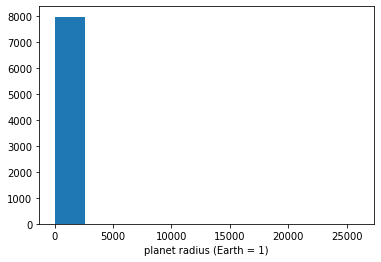

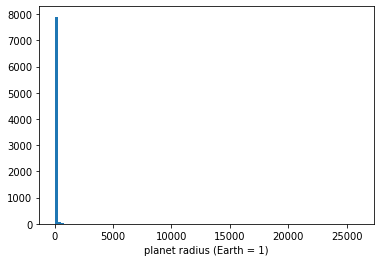

In [9]:
# Another plot method is histogram, which tells you about the relative abundance of something
# here is a histogram of KOI radii
plt.hist(cfpTable.koi_prad); # end with ";" to avoid annoying text output
plt.xlabel("planet radius (Earth = 1)")
# hist puts the data into bins, and plots the number in each bin as height
# defaults to 10 bins
# this is not very useful becuse KOIs include binary stars which can be really really big
# We want more resolution.  Use the next argument to hist, which sets the number of bins
plt.figure()
plt.hist(cfpTable.koi_prad, 100); # end with ";" to avoid annoying text output
plt.xlabel("planet radius (Earth = 1)")



Text(0.5, 0, 'planet radius (Earth = 1)')

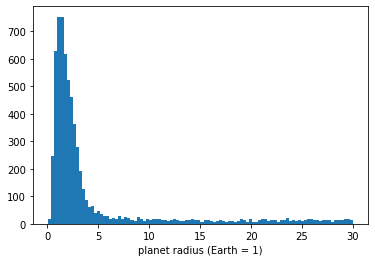

In [10]:
# Now we see that most planets are small, but the x range (= data range) is too large to see the details
# But we think planets larger than 30 Earth radii are not planets.  
# So we use the ability to select KOIs based on the KOI properties to look at only KOIs with radius < 30
plt.figure()
plt.hist(cfpTable[cfpTable.koi_prad<30].koi_prad, 100); # end with ";" to avoid annoying text output
plt.xlabel("planet radius (Earth = 1)")
# Remember, square brackets selects KOIs, so "[cfpTableBerger.koi_prad<30]" is selecting 
# KOIs with radius < 30
# so now we see that most of the KOIs have a radius around 2.
# let's take a closer look


Text(0.5, 0, 'planet radius (Earth = 1)')

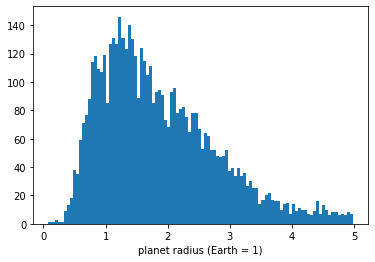

In [11]:
plt.figure()
plt.hist(cfpTable[cfpTable.koi_prad<5].koi_prad, 100); # end with ";" to avoid annoying text output
plt.xlabel("planet radius (Earth = 1)")
# so now we see that most of the KOIs have a radius between 2 and 3 times the size of the Earth!  
# This was a surprise.


There are 4034 planet candidates


Text(0.5, 0, 'planet radius (Earth = 1)')

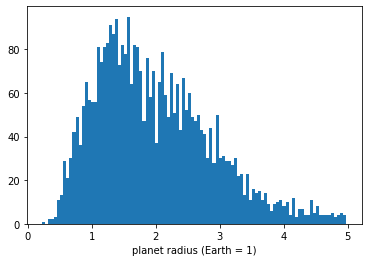

In [12]:
# But not all KOIs are actual planet candidates: many are false positives.
# Let's make a new table with the planet candidates:
PCs = cfpTable[cfpTable.koi_pdisposition == "CANDIDATE"]
print("There are " + str(len(PCs)) + " planet candidates")
# so let's plot the PC radius histogram
plt.figure()
plt.hist(PCs[PCs.koi_prad<5].koi_prad, 100); # end with ";" to avoid annoying text output
plt.xlabel("planet radius (Earth = 1)")
# We see about the same radius distribution

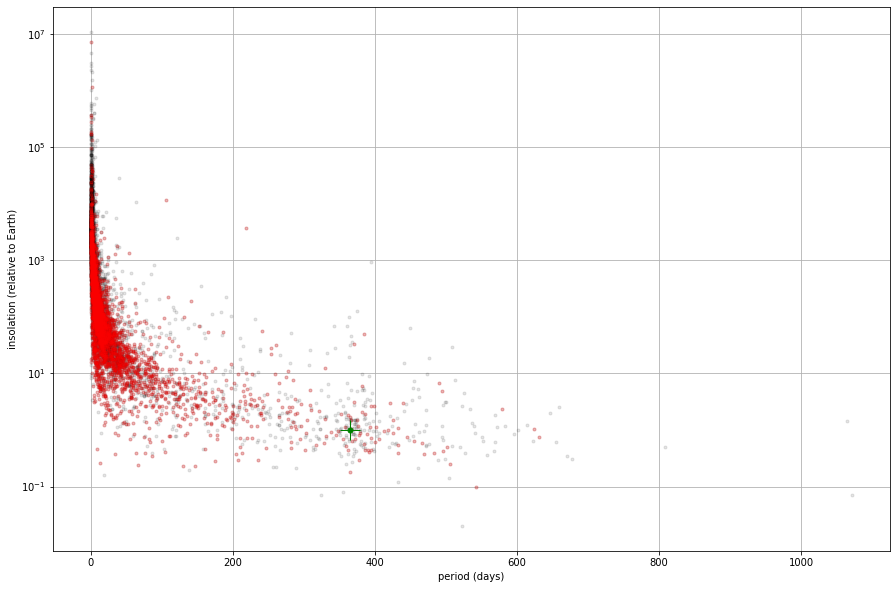

In [15]:
# Let's go back to the period-insolation plot, and compare all KOIs with the PCs
plt.figure(figsize = (15,10)) # figsize needs a pair of numbers in parentheses.
# plot the KOIs with transparency in black
plt.semilogy(cfpTable.koi_period, cfpTable.koi_insol, 'k.', alpha=0.1) # format 'k' means plot in black
# plot the PCs with less transparency in red
plt.semilogy(PCs.koi_period, PCs.koi_insol, 'r.', alpha=0.2) 

plt.xlabel("period (days)")
plt.ylabel("insolation (relative to Earth)")
plt.grid()
plt.plot(365.25, 1, 'g.', markersize=10) # plot the Earth with a big green dot for contrast
plt.plot(365.25, 1, 'g+', markersize=20) # plot the Earth with green cross for contrast

# we see that lots of the short-period, hot (= high insolation) planets are PCs
# (though we can't tell the fraction because so many are plotted on top of one another)
# but around the Earth there are about as twice as many KOIs as PCs, meaning that 
# about half the KOIs are false positives.

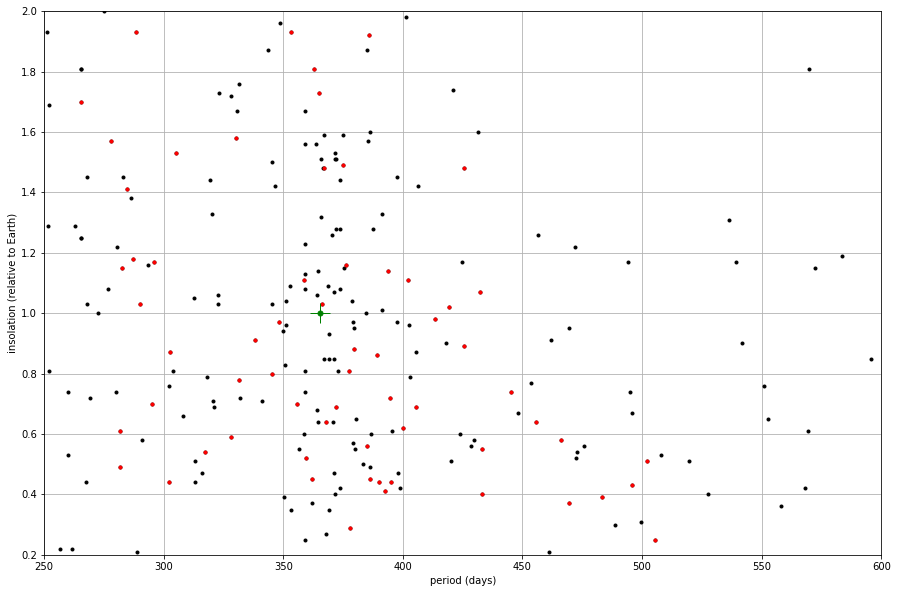

In [50]:
# Let's zoom in on the Earth region by setting the x limits and y limits of the plot
plt.figure(figsize = (15,10)) # figsize needs a pair of numbers in parentheses.
# plot the KOIs with transparency in black
# because we're zooming in we don't need log plotting in y
# we also don't need transparency because there are not so many planets
plt.plot(cfpTable.koi_period, cfpTable.koi_insol, 'k.') # format 'k' means plot in black
# plot the PCs with less transparency in red
plt.plot(PCs.koi_period, PCs.koi_insol, 'r.') 
plt.xlim(250, 600) # set the x limits to orbital periods between 250 and 600 days
plt.ylim(0.2, 2) # set the y limits to insolation between 0.2 and 2 times Earth (which is a habitable range)
plt.xlabel("period (days)")
plt.ylabel("insolation (relative to Earth)")
plt.grid()
plt.plot(365.25, 1, 'g.', markersize=10) # plot the Earth with a big green dot for contrast
plt.plot(365.25, 1, 'g+', markersize=20) # plot the Earth with green cross for contrast


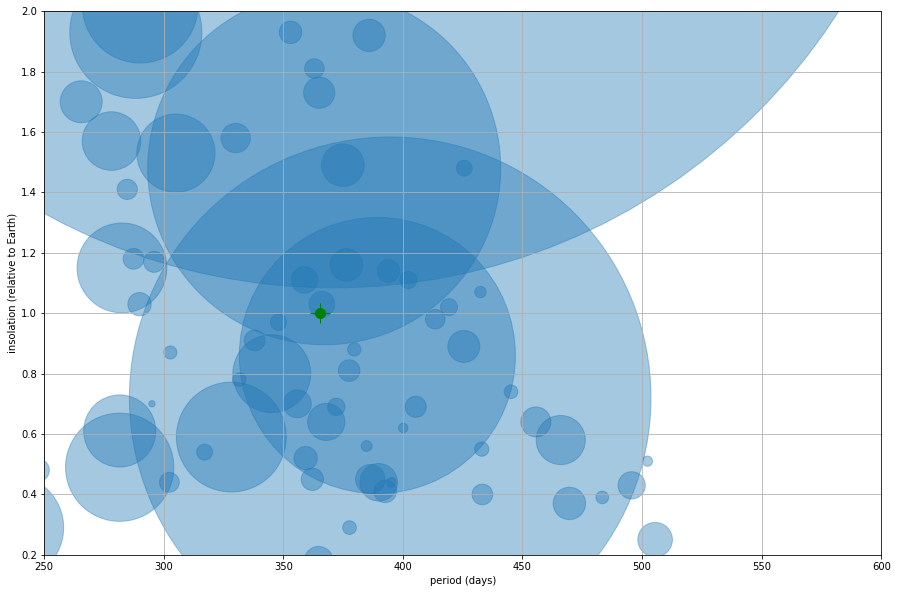

In [52]:
# a nice variation on plot is scatter plot, which lets us plot the dots (called "markers")
# with size that depend on other properties such as radius
plt.figure(figsize = (15,10)) # figsize needs a pair of numbers in parentheses.
# in scatter, set the size with the 's' command, which sets the area of the markers
# so set size to the square of the data to get the size right
# plot just the PCs because some of the KOIs are VERY large
# multiply the size by 100 so we can see the size of the Earth
plt.scatter(PCs.koi_period, PCs.koi_insol, s=100*PCs.koi_prad**2, alpha = 0.4) 
plt.xlim(250, 600) # set the x limits to orbital periods between 250 and 600 days
plt.ylim(0.2, 2) # set the y limits to insolation between 0.2 and 2 times Earth (which is a habitable range)
plt.xlabel("period (days)")
plt.ylabel("insolation (relative to Earth)")
plt.grid()
plt.scatter(365.25, 1, color="green", s=100) # plot the Earth with green dot for contrast, with the correct size
plt.plot(365.25, 1, 'g+', markersize=20); # plot the Earth with green cross for contrast


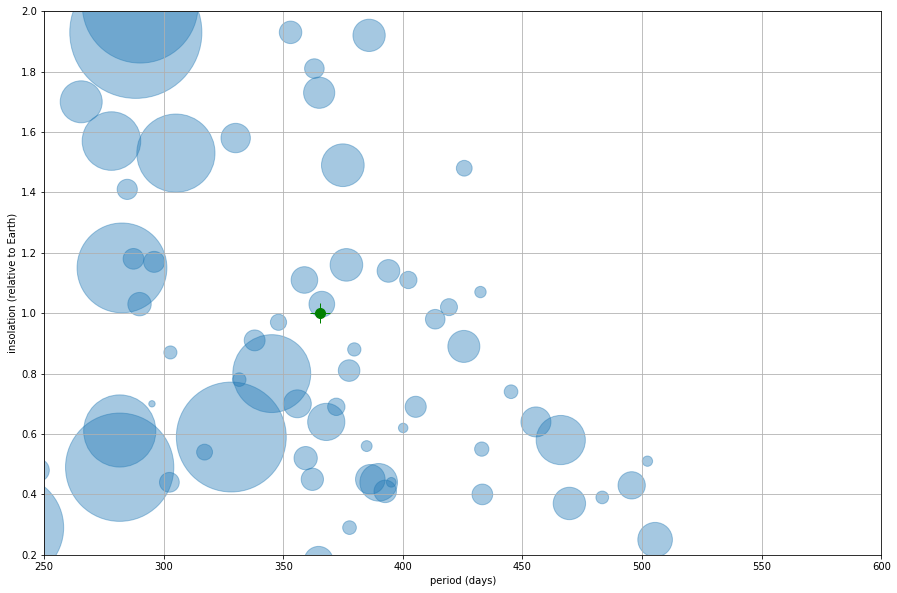

In [32]:
# Some of those PCs are still way too big, so pick out the ones smaller than 20 times the Earth
# which we are confident are planets
smallPCs = PCs[PCs.koi_prad < 20]
plt.figure(figsize = (15,10)) # figsize needs a pair of numbers in parentheses.
# in scatter, set the size with the 's' command, which sets the area of the markers
# so set size to the square of the data to get the size right
# plot just the PCs because some of the KOIs are VERY large
# multiply the size by 100 so we can see the size of the Earth
plt.scatter(smallPCs.koi_period, smallPCs.koi_insol, s=100*smallPCs.koi_prad**2, alpha = 0.4) 
plt.xlim(250, 600) # set the x limits to orbital periods between 250 and 600 days
plt.ylim(0.2, 2) # set the y limits to insolation between 0.2 and 2 times Earth (which is a habitable range)
plt.xlabel("period (days)")
plt.ylabel("insolation (relative to Earth)")
plt.grid()
plt.scatter(365.25, 1, color="green", s=100) # plot the Earth with green dot for contrast, with the correct size
plt.plot(365.25, 1, 'g+', markersize=20); # plot the Earth with green cross for contrast
# so now we see that most of these planets are larger than the Earth, but some of them are not 
# much larger, and they get an amount of sunlight similar to the Earth!

Text(0.5, 1.0, 'Planet Candidate Size vs. Insolation')

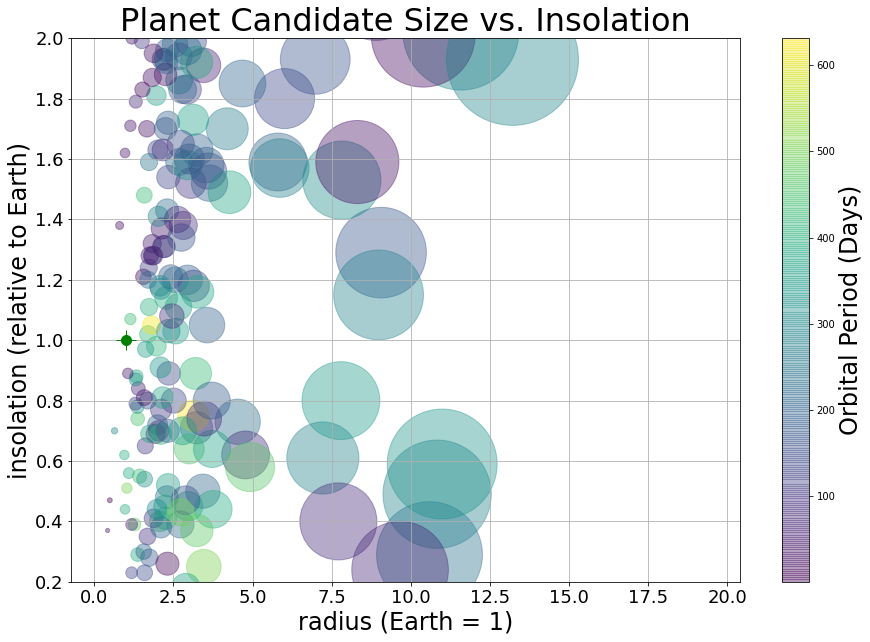

In [53]:
# to get a better sense of the habitable planets and their sizes, let's plot radius vs. insolation
# and keep the size as radius
plt.figure(figsize = (15,10)) # figsize needs a pair of numbers in parentheses.
# in scatter, set the size with the 's' command, which sets the area of the markers
# so set size to the square of the data to get the size right
# plot just the PCs because some of the KOIs are VERY large
# multiply the size by 100 so we can see the size of the Earth
# Now let's color them by their orbital period with the 'c' command
plt.scatter(smallPCs.koi_prad, smallPCs.koi_insol, s=100*smallPCs.koi_prad**2, c=smallPCs.koi_period, alpha = 0.4) 
# add a colorbar to interpret the colors
cb = plt.colorbar()
# label the colorbar, setting the font size
cb.ax.set_ylabel("Orbital Period (Days)", fontsize = 24);

plt.grid()
plt.scatter(1, 1, color="green", s=100) # plot the Earth with green dot for contrast, with the correct size
plt.plot(1, 1, 'g+', markersize=20); # plot the Earth with green cross for contrast

plt.ylim(0.2, 2) # set the y limits to insolation between 0.2 and 2 times Earth (which is a habitable range)
# let's make the plot look nice by having larger label fonts
plt.xlabel("radius (Earth = 1)", fontsize = 24)
plt.ylabel("insolation (relative to Earth)", fontsize = 24)
# let's make the tick marks on the axes readable by making them larger
plt.tick_params(labelsize = 18)
# finally let's add a title
plt.title("Planet Candidate Size vs. Insolation", fontsize = 32)
# so now we see there are a few PCs the size of the Earth or smaller, but most planets with 
# insolation like the Earth are larger.

# Caution!  These planet radii are using the old stellar catalog and are probably wrong...

In [ ]:
# to learn more about plotting, search google for "matplotlib"